In [1]:
import matplotlib.pyplot as plt
import _pickle as pickle
import tensorflow as tf
import sys
print(sys.path)
from core.prev_solver import CaptioningSolver
from core.prev_model import CaptionGenerator
from core.utils import load_coco_data


from core.prev_bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

['', '/opt/caffe-rc4/python', '/opt/anaconda3/lib/python35.zip', '/opt/anaconda3/lib/python3.5', '/opt/anaconda3/lib/python3.5/plat-linux', '/opt/anaconda3/lib/python3.5/lib-dynload', '/opt/anaconda3/lib/python3.5/site-packages', '/opt/anaconda3/lib/python3.5/site-packages/Sphinx-1.4.6-py3.5.egg', '/opt/anaconda3/lib/python3.5/site-packages/Keras-2.0.3-py3.5.egg', '/opt/anaconda3/lib/python3.5/site-packages/Theano-0.10.0b4-py3.5.egg', '/opt/anaconda3/lib/python3.5/site-packages/hickle-2.0.5-py3.5.egg', '/opt/anaconda3/lib/python3.5/site-packages/setuptools-27.2.0-py3.5.egg', '/opt/anaconda3/lib/python3.5/site-packages/IPython/extensions', '/root/.ipython']


In [2]:
data = load_coco_data(data_path='./resized_training_data', split='val')
with open('./resized_training_data/train/word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

/data_0 n KeysView(<Attributes of HDF5 object at 140702190497368>)
features <class 'numpy.ndarray'> (869, 196, 512) float32
file_names <class 'numpy.ndarray'> (869,) <U42
image_idxs <class 'numpy.ndarray'> (869,) int32
captions <class 'numpy.ndarray'> (869, 17) int32
Elapse time: 0.14


In [3]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=1024, n_time_step=16, prev2out=True, 
                                             ctx2out=True, alpha_c=1.0, selector=True, dropout=True)

In [4]:
solver = CaptioningSolver(model, data, data, n_epochs=15, batch_size=128, update_rule='adam',
                                      learning_rate=0.0025, print_every=2000, save_every=1, image_path='./image/',
                                pretrained_model=None, model_path='./prev_model/lstm', test_model='./prev_model/lstm/model-20',
                                 print_bleu=False, log_path='./log/')

Sampled Caption: a parked car .


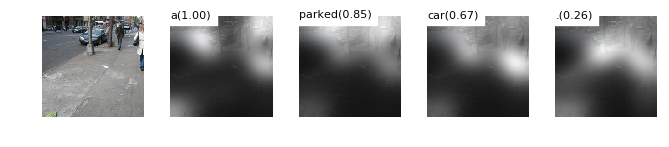

Sampled Caption: a white car on the street .


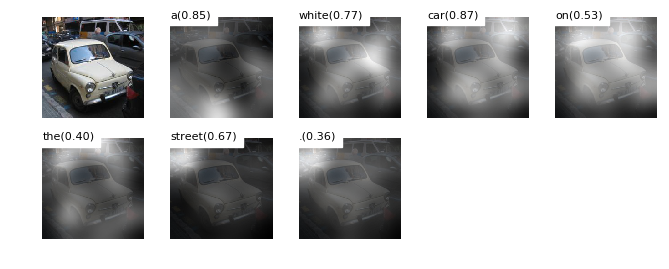

Sampled Caption: a window in the background .


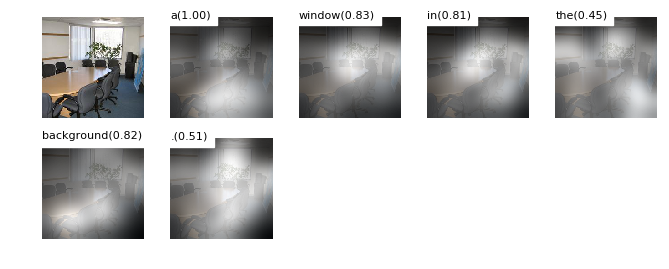

Sampled Caption: a white car on the street .


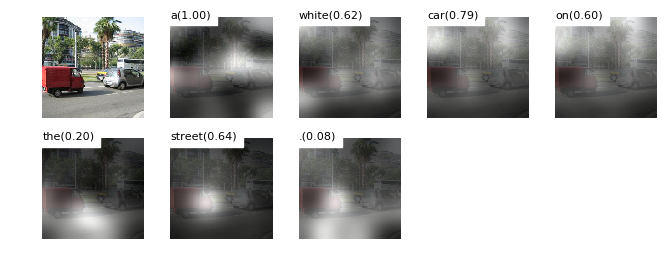

Sampled Caption: the window is made of glass .


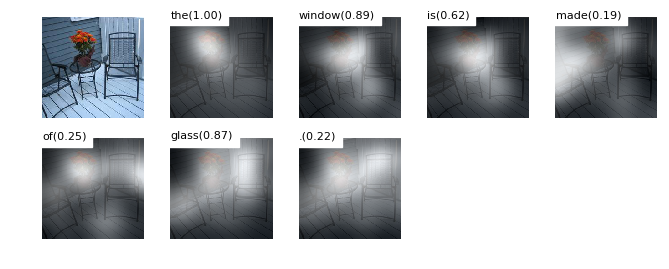

Sampled Caption: a red and white reflector on a bike .


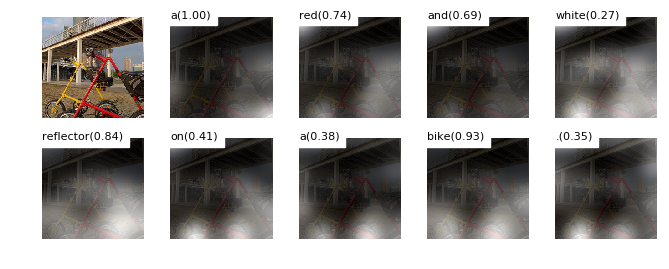

Sampled Caption: a large white building .


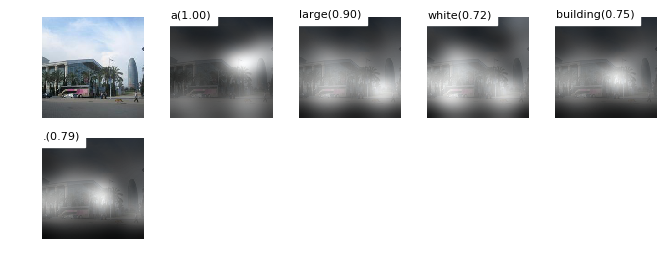

Sampled Caption: a plate of food on the table .


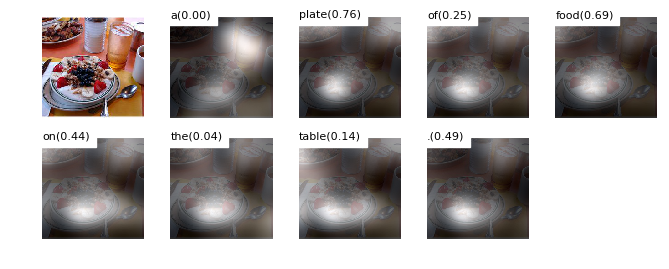

Sampled Caption: a white line painted on the road .


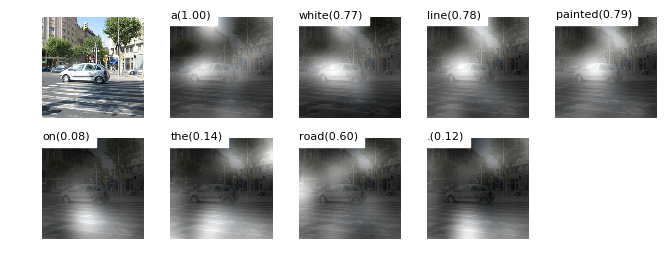

Sampled Caption: a tree in the distance .


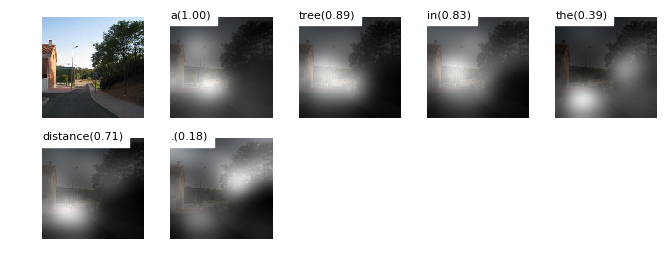

Saved ./resized_training_data/prev_val/val.candidate.captions.pkl..


In [5]:
solver.test(data, split='val')

In [6]:
test = load_coco_data(data_path='./resized_training_data', split='test')

/data_0 n KeysView(<Attributes of HDF5 object at 140697297857632>)
features <class 'numpy.ndarray'> (870, 196, 512) float32
file_names <class 'numpy.ndarray'> (870,) <U42
image_idxs <class 'numpy.ndarray'> (870,) int32
captions <class 'numpy.ndarray'> (870, 17) int32
Elapse time: 0.13


Sampled Caption: a window on a building .


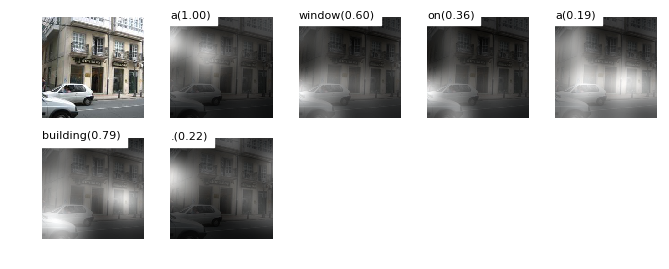

Sampled Caption: the grass is green in color .


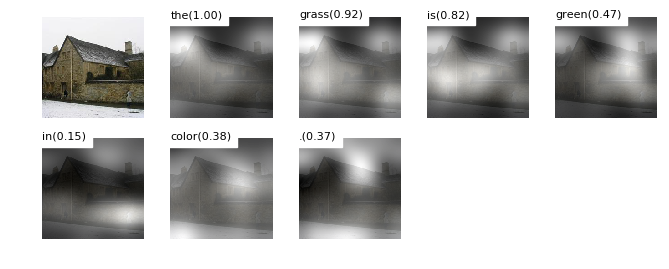

Sampled Caption: a window on a building .


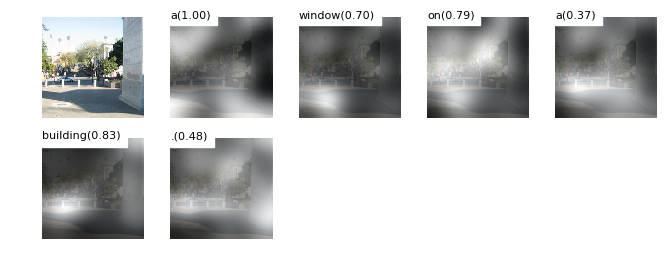

Sampled Caption: a red truck on the road .


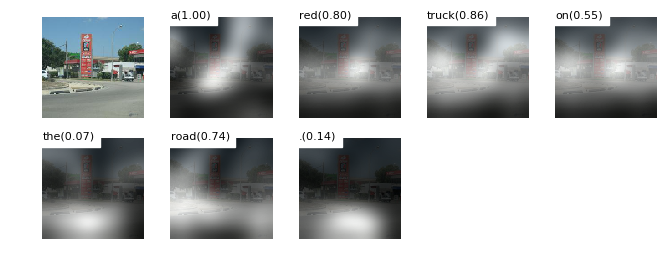

Sampled Caption: a building on the other side of the street .


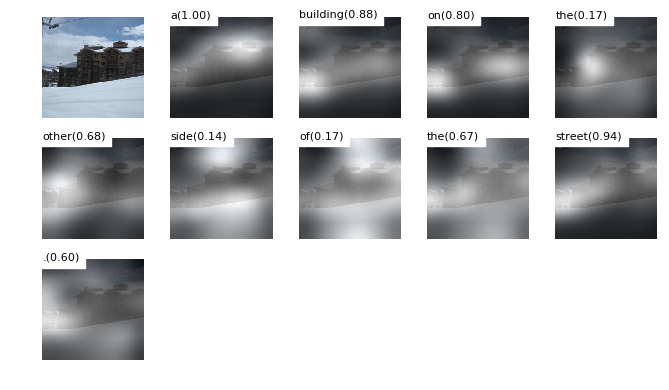

Sampled Caption: a white and black sign on the side of the road .


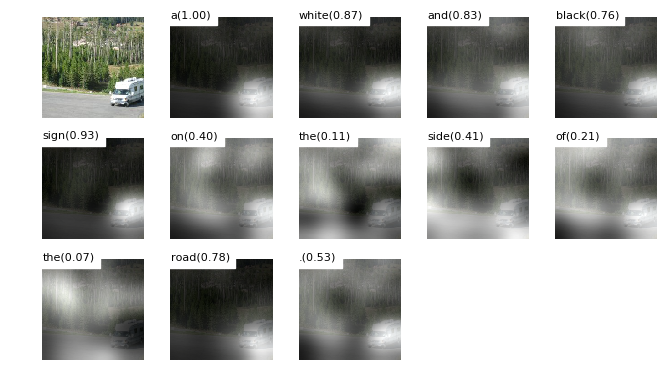

Sampled Caption: a red and white sign .


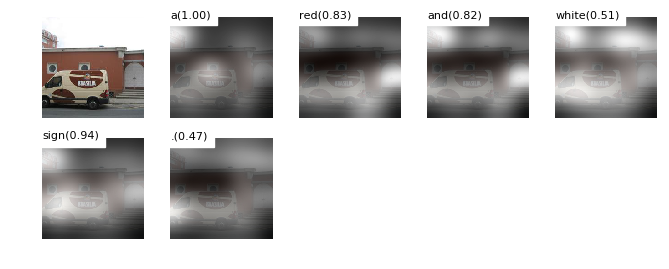

Sampled Caption: a man wearing a white shirt .


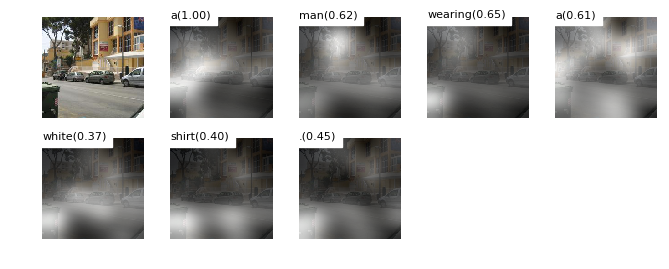

Sampled Caption: a window on the train .


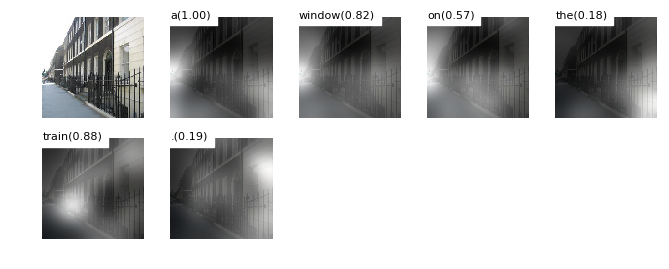

Sampled Caption: a white van parked on the street .


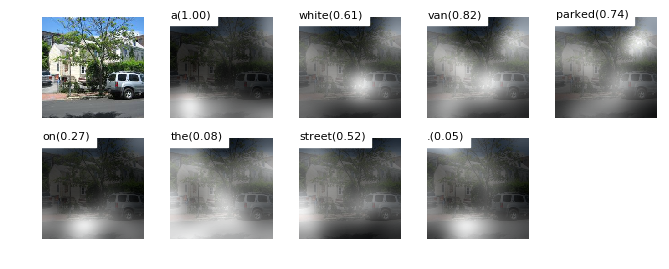

Saved ./resized_training_data/prev_test/test.candidate.captions.pkl..


In [7]:
tf.get_variable_scope().reuse_variables()
solver.test(test, split='test')

In [8]:
evaluate(data_path='./resized_training_data', split='val')

['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4'] started
{'reflen': 6075, 'testlen': 6052, 'correct': [1823, 214, 53, 20], 'guess': [6052, 5183, 4314, 3445]}
ratio: 0.9962139917693833
['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4'] done
ROUGE_L started
ROUGE_L done
CIDEr started
CIDEr done
Bleu_1:	 0.3000801429627887
Bleu_2:	 0.11109887612634695
Bleu_3:	 0.053258409135206915
Bleu_4:	 0.030573046141782283
ROUGE_L: 0.294280837848
CIDEr:	 0.294158913776


In [ ]:
evaluate(data_path='./resized_training_data', split='test')